<a href="https://colab.research.google.com/github/Waye/CSC420-CourseWork-fall2019/blob/master/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Q1.

(a). Ignore the boundry effects, since n $\geq$ m, if n  are large enough, the size of boundry area does not really effect on running time. Regardless, $I$ has $O(n^2)$ patches.\
 For each patch, there will be $m^2$ multiplication and $m^2-1$ summation. So runtime is $n^2 \times (m^2 + m^2-1) = O(n^2m^2)$ \

(b).Same rule applies here from (a), there are $n^2$ patches. And we know if $h$
is separable then function $I*h=I*(g*J)$ where $I$ has size $ n \times n$, $h$ has size $m\times m$, $g$ has size $m \times 1$, $J$ has size $1 \times m$. And by associate rule of matrix,
$I*(g*J)=(I*g)*J$, since there are $n^2$ patches in $I$, $I*g$ takes $O(n^2m)$.
And still there are $n^2$ in $I*g$, so $(I*g)*J$ also takes $O(n^2m)$. Totally, runtime is $2 \times n^2m=O(n^2m)$

Q2. 

1.  **Apply Gaussian filter to smooth the image in order to remove the noise:** Since all edge detection results are easily affected by image noise, it is essential to filter out the noise to prevent false detection caused by noise. To smooth the image, a Gaussian filter is applied to convolve with the image. This step will slightly smooth the image to reduce the effects of obvious noise on the edge detector.
2. **Find the intensity gradients of the image:** An edge in an image may point in a variety of directions, so the Canny algorithm uses four filters to detect horizontal, vertical and diagonal edges in the blurred image.  Edges are areas of rapid intensity change, and thus they appear as extrema in these derivatives. The edge detection operator (such as Roberts, Prewitt, or Sobel) returns a value for the first derivative in the horizontal direction ($I_{x}$) and the vertical direction ($I_{y}$). From this the edge gradient and direction can be determined:\
Gradient $\nabla I= \sqrt{I_{x}^2+I_{y}^2}$\
Orientation $\theta = arctan(\frac{I_{x}}{I_{y}})$\

3. **Reduce the width of the edge:**At this point, the detected edges are probably fairly thick (i.e. many pixels wide). In order to produce clearly defined (one-pixel thick) edges, the algorithm must
reduce the width of the detected edges. To accomplish this, non-maxima suppression is used - essentially, only the most intense edge pixels in a
neighbourhood are kept. The gradients and orientations calculated in the previous step are used to accomplish this. If a pixel is a local maximum along its
gradient's orientation.
4. **Apply double threshold to determine potential edges:**After application of Reducing the width of the edge, remaining edge pixels provide a more accurate representation of real edges in an image. However, some edge pixels remain that are caused by noise and color variation. In order to account for these spurious responses, it is essential to filter out edge pixels with a weak gradient value and preserve edge pixels with a high gradient value. This is accomplished by selecting high and low threshold values. If an edge pixel’s gradient value is higher than the high threshold value, it is marked as a strong edge pixel. If an edge pixel’s gradient value is smaller than the high threshold value and larger than the low threshold value, it is marked as a weak edge pixel. If an edge pixel's value is smaller than the low threshold value, it will be suppressed. The two threshold values are empirically determined and their definition will depend on the content of a given input image.
5. **Track edge by hysteresis: Finalize the detection of edges by suppressing all the other edges that are weak and not connected to strong edges:**So far, the strong edge pixels should certainly be involved in the final edge image, as they are extracted from the true edges in the image. However, there will be some debate on the weak edge pixels, as these pixels can either be extracted from the true edge, or the noise/color variations. To achieve an accurate result, the weak edges caused by the latter reasons should be removed. Usually a weak edge pixel caused from true edges will be connected to a strong edge pixel while noise responses are unconnected. To track the edge connection, blob analysis is applied by looking at a weak edge pixel and its 8-connected neighborhood pixels. As long as there is one strong edge pixel that is involved in the blob, that weak edge point can be identified as one that should be preserved.




Q3. Since edge are the small areas in the graph that rapidly change, as we know the function of Laplacian of Gaussians is also used to find Edge by detecting zero-crossings. It shows that zero-crossings of the Laplacian is the result from both second-order derivatives being zero which means there is a extrema in first derivative. And edge exsits at that rapid change.



Q4.

Correlation-- After effect size of image: (238, 238) mode:  valid


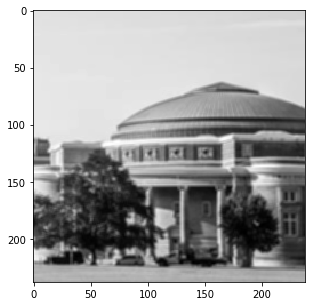

In [0]:
#(a).



from scipy import signal
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image,ImageFilter
from skimage import util

# So I don't have to type out quotes
valid, same, full = "valid", "same", "full"

def imageTransfer(ImagePath):
  img = Image.open(ImagePath)
  imgArray = np.array(img)

  if img.getbands() == ('L',):
    gray=imgArray
  else:
    r, g, b = imgArray[:,:,0], imgArray[:,:,1], imgArray[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
  return gray

def padArray(I, h_h, w_h, mode):
  if mode == same:
    pad_h, pad_w = h_h //2, w_h //2
  if mode == valid:
    pad_h, pad_w = 0,0
  if mode == full:
    pad_h, pad_w = h_h  -1, w_h -1
  return mode, np.pad(I,[(pad_h, pad_h),(pad_w,pad_w)] ,mode="constant",constant_values=0)

def MyCorrelation(I, h, mode):
  I_h, I_w = np.array(I).shape
  h_h, h_w = np.array(h).shape
  mode, intermediateArray = padArray(I,h_h, h_w,mode)
  inter_h, inter_w = np.array(intermediateArray).shape
  
  if mode == same:
    output=np.empty([I_w,I_h])
  if mode == valid:
    output=np.empty([I_w-h_w+1,I_h-h_h+1])
  if mode == full:
    output=np.empty([I_w+h_w-1,I_h+h_h-1])

  for i in range( output.shape[0]):
    for j in range(output.shape[1]):
      # find relative patch coordinates on intermediate array 
      patch=intermediateArray[(i+h_w//2)-h_w//2: (i+h_w//2) + h_w//2+1, (j+h_h//2)-h_h//2: (j+h_h//2) + h_h//2+1]
      output[i,j] = np.sum(h*patch)
  return output
  
  
  

# example
imgArray = imageTransfer('/content/drive/My Drive/image/color.jpg')
f = np.ones([3,3])/17
output= MyCorrelation(imgArray,f,valid)
print("Correlation-- After effect ""size of image:",output.shape,"mode: ", valid)
plt.figure(figsize=(10,5))
plt.imshow(output, cmap="gray")


Convolution-- After effect size of image: (242, 242) mode:  full


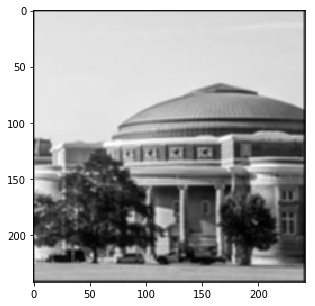

In [0]:
#(b).
def MyConvolution(I, h, mode):
  I_h, I_w = np.array(I).shape
  h_h, h_w = np.array(h).shape
  mode, intermediateArray = padArray(I,h_h, h_w,mode)
  inter_h, inter_w = np.array(intermediateArray).shape
  
  if mode == same:
    output=np.empty([I_w,I_h])
  if mode == valid:
    output=np.empty([I_w-h_w+1,I_h-h_h+1])
  if mode == full:
    output=np.empty([I_w+h_w-1,I_h+h_h-1])

  # # rotate 90 degree twice 
  # intermediateArray=np.rot90(intermediateArray,2)
  for i in range( output.shape[0]):
    for j in range(output.shape[1]):
      # find relative patch coordinates on intermediate array 
      patch=np.flip(intermediateArray[(i+h_w//2)-h_w//2: (i+h_w//2) + h_w//2+1, (j+h_h//2)-h_h//2: (j+h_h//2) + h_h//2+1],)
      output[i,j] = np.sum(h*patch)
  return output


imgArray = imageTransfer('/content/drive/My Drive/image/color.jpg')
f = np.ones([3,3])/17
output=MyConvolution(imgArray,f,full)
print("Convolution-- After effect ""size of image:",output.shape,"mode: ", full)
plt.figure(figsize=(10,5))
plt.imshow(output, cmap="gray")

By gaussian filter you still observe that the background becomes smoothy and a litte blur


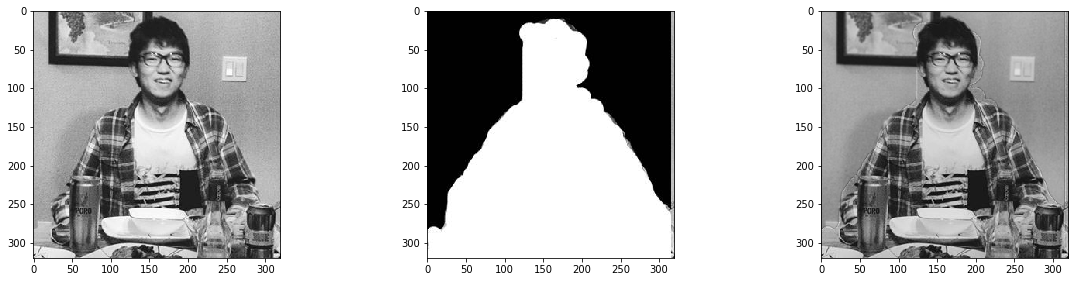

In [0]:
#(c).
dpArray = imageTransfer('/content/drive/My Drive/image/dp2.jpg')
mask2 = imageTransfer('/content/drive/My Drive/image/mask2.jpg')/255


face = dpArray * mask2
background = dpArray * util.invert(mask2)

gaussian_filter = np.array([[1,2,1],[2,4,2],[1,2,1]])/16

blur_background= MyConvolution(background,gaussian_filter,same)
images3=[dpArray,mask2,face+blur_background]


print("By gaussian filter you still observe that the background becomes smoothy and a litte blur")
plt.figure(figsize=(20,10))
columns = 3
for i, image in enumerate(images3):
    plt.subplot(len(images3) / columns + 1, columns, i + 1)
    plt.imshow(image,cmap="gray")

I manually segmenet out the foreground mask. And use it to segmennt out background and foreground/face. Then I use same mode and gaussian filter to blur background. Since mask and image has same pixel size. For the purpose, I choose same mode. Gaussian filter is a matrix I got from lecture note, from class we know it can blur image. 

Q5.

(a).A separable filter in image processing can be written as product of two more simple filters. Typically a 2-dimensional convolution operation is separated into two 1-dimensional filters. This reduces the cost of computing the operator.

In [0]:
# (b).
from scipy import signal
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image,ImageFilter
from skimage import util

def isSeparableFilter(f):
  if np.linalg.matrix_rank(f) > 1:
    return False
  else:
    u, s, v = np.linalg.svd(f)
    # since u is a column vector
    vertical_line=np.sqrt(s[0])*u[:,0]
    horizontal_line=np.sqrt(s[0])*v[0]
    print("vertical_line:",vertical_line)
    print("horizontal_line:",horizontal_line)
    return True

# example 
f1=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])/8
print(isSeparableFilter(f1))

f2=np.array([[11,13],[24,113]])
print(isSeparableFilter(f2))

  

vertical_line: [-0.26864248 -0.53728497 -0.26864248]
horizontal_line: [ 0.46530243  0.         -0.46530243]
True
False


Q6.

left : oringinal one, right: noisy one


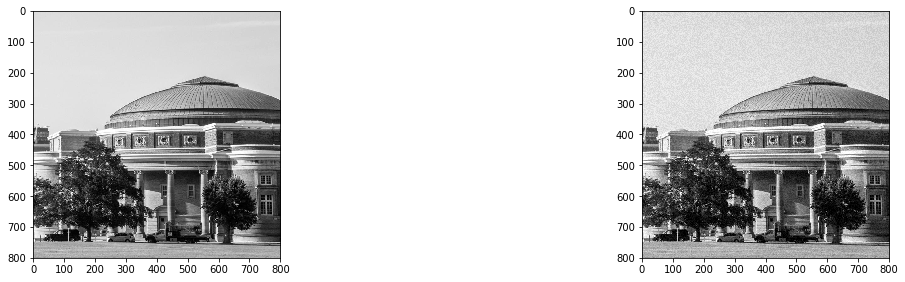

In [0]:
#(a).
# uniformly distributed random noise
# range[0,1]
# range of noise[-0.05,0.05]
# input a grayscale image I , the magnitude of random noises m
def AddRandNoise(I,m=0.05):
  I=I/255
  noise=np.random.uniform(-0.05,0.05,I.shape)
  I+=noise
  I=np.clip(I,0,1)
  return I

# example
imgArray = imageTransfer('/content/drive/My Drive/image/gray.jpg')

images=[imgArray,AddRandNoise(imgArray)]
print("left : oringinal one, right: noisy one")
plt.figure(figsize=(20,10))
columns = 2
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image,cmap="gray")


  


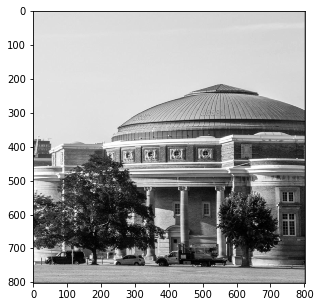

In [0]:
# (b).
# guassian filter
output=MyConvolution(imgArray,gaussian_filter,full)
plt.figure(figsize=(10,5))
plt.imshow(output,cmap="gray")

Reason for guassian blur:\
Background: since the uniform noise causes quantizing the pixels of image to a number of distinct level. The gray level values of the noise are evenly distributed across a specific range.\
Conclusion:\
During gaussian blur proccessing,each pixel's new value is set to a weighted average of that pixel's neighborhood. The original pixel's value receives the heaviest weight (having the highest Gaussian value) and neighboring pixels receive smaller weights as their distance to the original pixel increases. This results in a blur that preserves boundaries and edges better than other.

left : oringinal one, right: noisy one


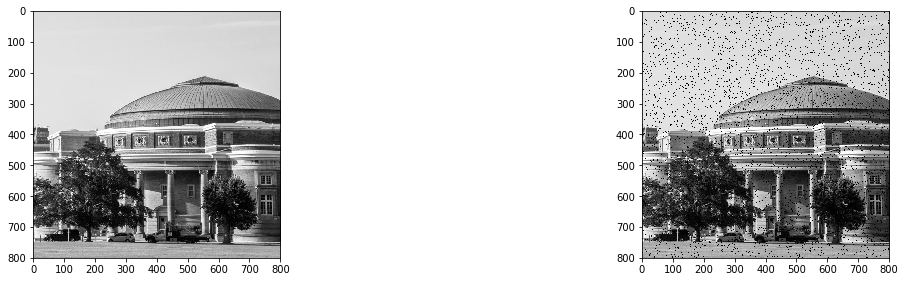

In [0]:
# (c).
# Set the density salt-and-pepper noises to 0.05 (5% of pixels affected) 
def AddSaltAndPepperNoise(I,d=0.05):
  I=I.copy()
  good=np.random.random(I.shape)>1-d
  I[good]=np.random.randint(0,1,I.shape)[good]*255
  return I

# example
orgArray = imageTransfer('/content/drive/My Drive/image/gray.jpg')

images1=[orgArray,AddSaltAndPepperNoise(orgArray)]
print("left : oringinal one, right: noisy one")
plt.figure(figsize=(20,10))
columns = 2
for i, image in enumerate(images1):
    plt.subplot(len(images1) / columns + 1, columns, i + 1)
    plt.imshow(image,cmap="gray")



left :gaussian_filter , right: median_filter


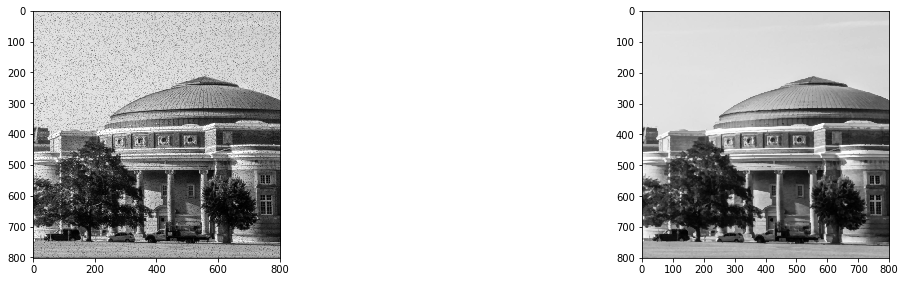

In [0]:
#(d)
from scipy import ndimage
orgArray = imageTransfer('/content/drive/My Drive/image/gray.jpg')
badArray = AddSaltAndPepperNoise(orgArray)

images1=[MyConvolution(badArray,gaussian_filter,full),ndimage.median_filter(badArray,size=5)]
print("left :gaussian_filter , right: median_filter")
plt.figure(figsize=(20,10))
columns = 2
for i, image in enumerate(images1):
    plt.subplot(len(images1) / columns + 1, columns, i + 1)
    plt.imshow(image,cmap="gray")


Reason for median_filter: \
Background: Salt-and-pepper noise is a form of noise sometimes seen on images. It is also known as impulse noise. This noise can be caused by sharp and sudden disturbances in the image signal. It presents itself as sparsely occurring white and black pixels.\
Reason: The main idea of the median filter is to run through the signal entry by entry, replacing each entry with the median of neighboring entries. The pattern of neighbors is called the "window", which slides, entry by entry, over the entire signal.

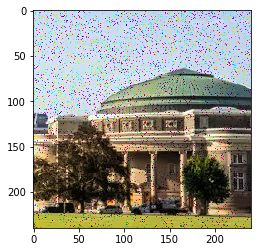

In [0]:
#(e).
from scipy import signal
img = cv2.imread('/content/drive/My Drive/image/color.jpg')
imgArray = np.array(img)
imgArrayR,imgArrayG,imgArrayB = imgArray[:,:,0], imgArray[:,:,1], imgArray[:,:,2]

# destroy image in three channels and merge them together
badR=AddSaltAndPepperNoise(imgArrayR)
badG=AddSaltAndPepperNoise(imgArrayG)
badB=AddSaltAndPepperNoise(imgArrayB)
badimg=cv2.merge((badR,badG,badB))

# Denoising
dst = cv2.fastNlMeansDenoisingColored(badimg,None,10,10,7,21)

# plt.imshow(cv2.cvtColor(badimg, cv2.COLOR_BGR2RGB))
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()




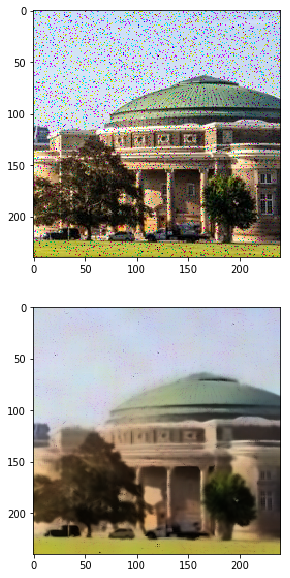

In [0]:

b,g,r = cv2.split(badimg)           # get b,g,r
rgb_img = cv2.merge([r,g,b])     # switch it to rgb

# Denoising
dst = cv2.fastNlMeansDenoisingColored(badimg,None,30,30,4,21)

b,g,r = cv2.split(dst)           # get b,g,r
rgb_dst = cv2.merge([r,g,b])     # switch it to rgb

plt.figure(figsize=(20,10))
plt.subplot(211),plt.imshow(rgb_img)
plt.subplot(212),plt.imshow(rgb_dst)
plt.show()

The function converts image to CIELAB colorspace and then separately denoise L and AB components with given h parameters using fastNlMeansDenoising function.
